# Featrue Engineering

In [1]:
# import packaged
import pandas as pd
import numpy as np
import datetime as dt 

import matplotlib.pyplot as plt

In [44]:
# import data
df = pd.read_csv('final_df.csv', index_col=0)

In [45]:
# keep only necessary columns (Jon's weather data)
# soil temp dropped because of high number nan's
to_keep = ['Location.x', 'JDay', 'Date', 'SsMean',
       'MeanWetness',
       'MeanTemp','MaxTemp', 
       'MinTemp', 'MeanRH', 
       'MaxRH','MinRH', 
       'TotalPrecip',
    'RainYN', 'MeanWC', 
       'MaxWC', 'MinWC',
       'MeanDP']

df2 = df[to_keep].copy()

df2.rename(columns={'Location.x': 'Location'}, inplace=True)

In [46]:
# drop SsMean nans
df2.dropna(inplace=True, subset=['SsMean'])

In [84]:
# check null values
df2.isnull().sum().sort_values(ascending=False).head(10)

Location       0
TotalPrecip    0
YearWeek       0
year           0
month          0
MeanDP         0
MinWC          0
MaxWC          0
MeanWC         0
RainYN         0
dtype: int64

In [83]:
# Keeping it simple for now...drop all nan values
df2.dropna(inplace=True)

In [85]:
# convert date to datetime
df2['Date'] = pd.to_datetime(df2['Date'])

In [86]:
# Create month 
df2['month'] = pd.to_datetime(df2['Date']).dt.month

In [87]:
# create year (from dt)
df2['year'] = pd.to_datetime(df2['Date']).dt.year

In [88]:
# create week of year
df2['YearWeek'] = pd.to_datetime(df2['Date']).dt.isocalendar().week

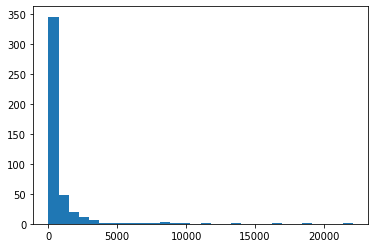

In [89]:
# look at target - log transform?
plt.hist(df2.SsMean, bins=30)
plt.show()

In [90]:
np.max(df2.SsMean)

22112.055

In [91]:
# add +1 to deal with 0s
df2['logSsMean'] = np.log(df2.SsMean + 1)

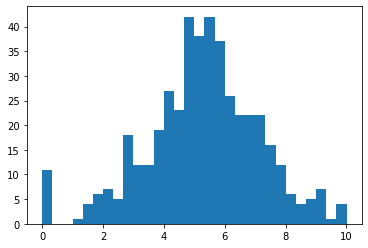

In [92]:
plt.hist(df2.logSsMean, bins=30)
plt.show()

In [93]:
# both year and location matter, sooooo averages have to be calculated for all of these separately

In [265]:
# create rolling average function

def rolling(data, col):
    # -1 day data
    name1 = col + '_1'
    # shift by 1
    lag1 = data[col].shift(1)
    # assign to column  
    data[name1] = lag1
    
    # -3 day mean
    name3 = col + '_3'
    # assign mean to column
    window3 = lag1.rolling(window=3).mean()
    data[name3] = window3
    
    # 7 day rolling mean leads to a lot of lost values
    # -7 day mean
    name7 = col + '_7'
    # assign mean to column
    window7 = lag1.rolling(window=7).mean()
    data[name7] = window7
    
    # fill NaN's with june mean info so that we can keep as much data as possible
    data[name1] = data[name1].fillna(value=data.iloc[1:7][name1].mean())
    data[name3] = data[name3].fillna(value=data.iloc[6:10][name3].mean())
    data[name7] = data[name7].fillna(value=data.iloc[:20][name7].mean())
    
    # return new dataframe
    return data

In [266]:
# create dfs for each location and year 
# (don't actually need to do year, because location names do not overlap b/w years)
locations = df2['Location'].unique().tolist()

dfa = df2.loc[df2['Location'] == locations[0]].copy()
dfb = df2.loc[df2['Location'] == locations[1]].copy()
dfc = df2.loc[df2['Location'] == locations[2]].copy()
dfd = df2.loc[df2['Location'] == locations[3]].copy()
dfe = df2.loc[df2['Location'] == locations[4]].copy()
dff = df2.loc[df2['Location'] == locations[5]].copy()
dfg = df2.loc[df2['Location'] == locations[6]].copy()
dfh = df2.loc[df2['Location'] == locations[7]].copy()
dfi = df2.loc[df2['Location'] == locations[8]].copy()

In [267]:
# rolling mean wet
df_list = [dfa, dfb, dfc, dfd, dfe, dff, dfg, dfh, dfi]

for frame in df_list:
    frame = rolling(frame, 'MeanWetness')

In [268]:
# rolling mean temp
df_list = [dfa, dfb, dfc, dfd, dfe, dff, dfg, dfh, dfi]

for frame in df_list:
    frame = rolling(frame, 'MeanTemp')

In [269]:
# rolling max temp
df_list = [dfa, dfb, dfc, dfd, dfe, dff, dfg, dfh, dfi]

for frame in df_list:
    frame = rolling(frame, 'MaxTemp')

In [270]:
# rolling min temp
df_list = [dfa, dfb, dfc, dfd, dfe, dff, dfg, dfh, dfi]

for frame in df_list:
    frame = rolling(frame, 'MinTemp')

In [271]:
# rolling mean humidity
df_list = [dfa, dfb, dfc, dfd, dfe, dff, dfg, dfh, dfi]

for frame in df_list:
    frame = rolling(frame, 'MeanRH')

In [272]:
# rolling max humidity
df_list = [dfa, dfb, dfc, dfd, dfe, dff, dfg, dfh, dfi]

for frame in df_list:
    frame = rolling(frame, 'MaxRH')

In [273]:
# rolling min humidity
df_list = [dfa, dfb, dfc, dfd, dfe, dff, dfg, dfh, dfi]

for frame in df_list:
    frame = rolling(frame, 'MinRH')

In [274]:
# rolling mean WC
df_list = [dfa, dfb, dfc, dfd, dfe, dff, dfg, dfh, dfi]

for frame in df_list:
    frame = rolling(frame, 'MeanWC')

In [275]:
# rolling max WC
df_list = [dfa, dfb, dfc, dfd, dfe, dff, dfg, dfh, dfi]

for frame in df_list:
    frame = rolling(frame, 'MaxWC')

In [276]:
# rolling min WC
df_list = [dfa, dfb, dfc, dfd, dfe, dff, dfg, dfh, dfi]

for frame in df_list:
    frame = rolling(frame, 'MinWC')

In [277]:
# rolling mean DP
df_list = [dfa, dfb, dfc, dfd, dfe, dff, dfg, dfh, dfi]

for frame in df_list:
    frame = rolling(frame, 'MeanDP')

In [278]:
# rolling total rainfall
df_list = [dfa, dfb, dfc, dfd, dfe, dff, dfg, dfh, dfi]

for frame in df_list:
    frame = rolling(frame, 'TotalPrecip')

In [279]:
# rolling spore count
df_list = [dfa, dfb, dfc, dfd, dfe, dff, dfg, dfh, dfi]

for frame in df_list:
    frame = rolling(frame, 'SsMean')

In [280]:
# for precip to 3 day total
def precip_3day(data):
    # -1 day data
    name = 'precip_3dTotal'   
    # -3 day mean
    width = 3
    # shift by 3
    lag = data['TotalPrecip'].shift(1)
    # assign mean to column
    window3 = lag.rolling(window=width).sum()
    data[name] = window3
    
    # fill NaN's with june mean info so that we can keep as much data as possible
    data[name] = data[name].fillna(value=data.iloc[6:10][name].mean())
        
    # return new dataframe
    return data

In [281]:
df_list = [dfa, dfb, dfc, dfd, dfe, dff, dfg, dfh, dfi]

for frame in df_list:
    frame = precip_3day(frame)

In [282]:
# join dfs together
df_list = [dfa, dfb, dfc, dfd, dfe, dff, dfg, dfh, dfi]
df3 = pd.concat(df_list, axis=0)

In [283]:
df3.shape

(451, 61)

In [284]:
df3.isnull().sum().sort_values(ascending=False).head(10)

Location     0
MinTemp_3    0
MeanRH_1     0
MeanRH_3     0
MeanRH_7     0
MaxRH_1      0
MaxRH_3      0
MaxRH_7      0
MinRH_1      0
MinRH_3      0
dtype: int64

In [286]:
df3.to_csv('JFE_data_18-19.csv')